In [1]:

import pandas as pd
file_id = '1HAAdP4rtI2EkJS_867XHMajXxY6z0sRU'
url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(url)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report , f1_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)

print(data.isnull().sum())

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
data[cols_with_zero] = imputer.fit_transform(data[cols_with_zero])

print(data.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


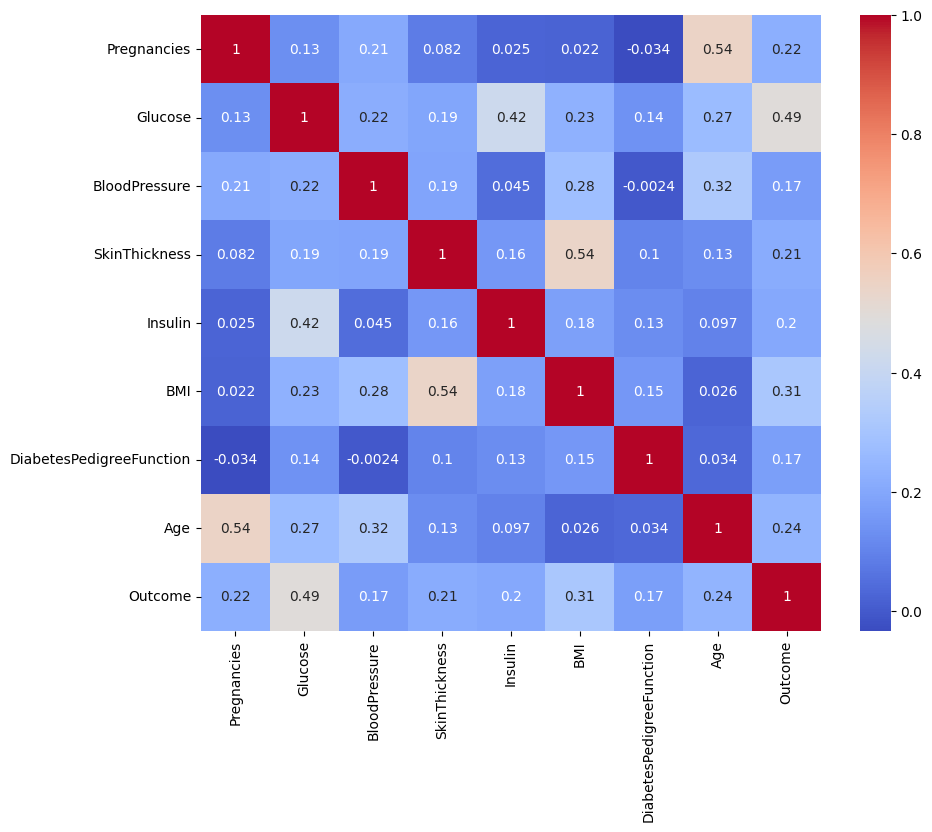

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


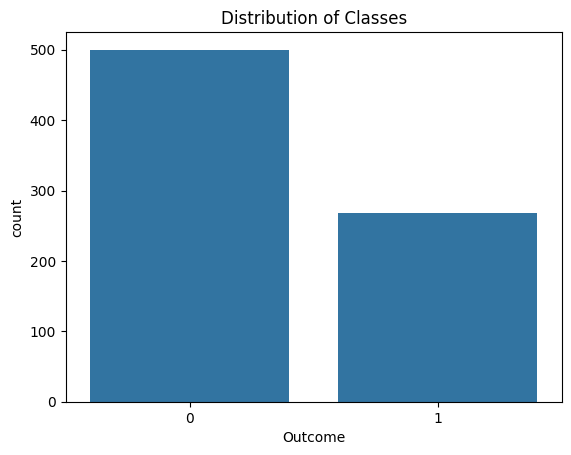

Class Distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


In [9]:
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Classes')
plt.show()

class_counts = data['Outcome'].value_counts()
print("Class Distribution:\n", class_counts)


In [3]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train_orig, X_test, y_train_orig, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_orig, y_train_orig)

print("Class distribution after SMOTE:")
print(pd.Series(y_train).value_counts())


Class distribution after SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64


In [4]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_leaf=1)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
y_pred = dt_classifier.predict(X_test)


In [7]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7338
Precision: 0.6585
Recall: 0.5000
F1 Score: 0.5684

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       100
           1       0.66      0.50      0.57        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



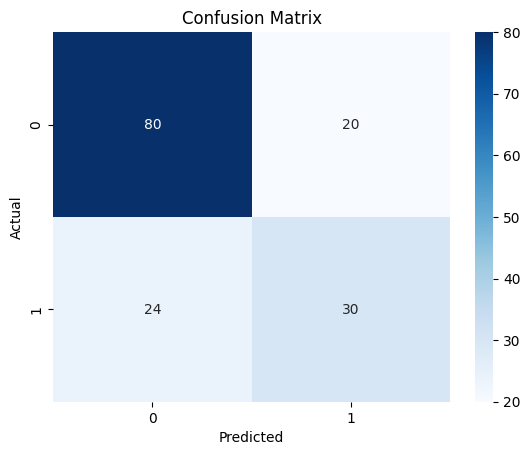

In [17]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
train_accuracy = dt_classifier.score(X_train, y_train)
test_accuracy = dt_classifier.score(X_test, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.05:
    print("Model might be overfitting as training accuracy is significantly higher than testing accuracy.")
elif test_accuracy > train_accuracy + 0.05:
    print("Model might be underfitting as testing accuracy is higher than training accuracy.")
else:
    print("Model seems to have a good fit with balanced training and testing accuracy.")


Training Accuracy: 1.0000
Testing Accuracy: 0.7338
Model might be overfitting as training accuracy is significantly higher than testing accuracy.


In [22]:
param_grid = {
    'max_depth': range(2, 21, 1),
    'min_samples_leaf': range(1, 11, 1),
    'criterion': ['gini', 'entropy']
}

dt_base = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 21),
                         'min_samples_leaf': range(1, 11)},
             scoring='f1')

In [23]:
results_df = pd.DataFrame(grid_search.cv_results_)


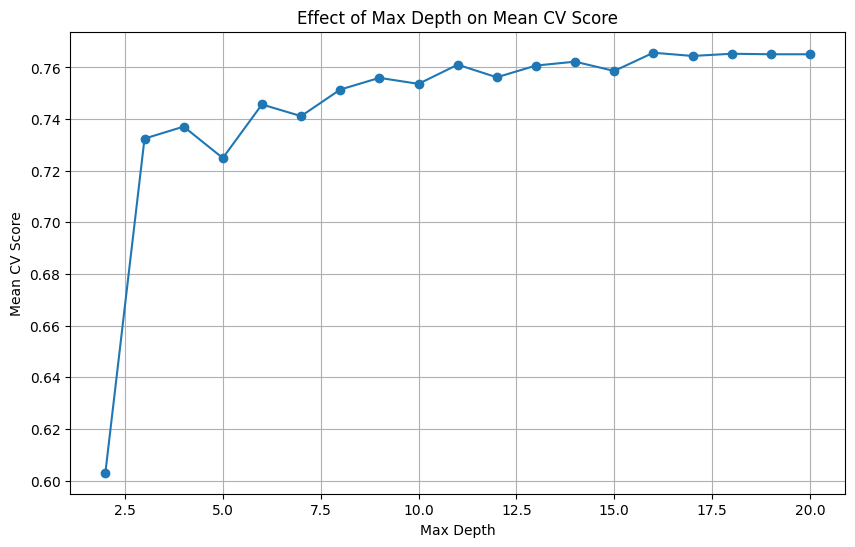

In [37]:
depth_scores = results_df[results_df['param_min_samples_leaf'] == 1].groupby('param_max_depth')['mean_test_score'].mean()

plt.figure(figsize=(10, 6))
plt.plot(depth_scores.index, depth_scores.values, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Score')
plt.title('Effect of Max Depth on Mean CV Score')
plt.grid(True)
plt.show()

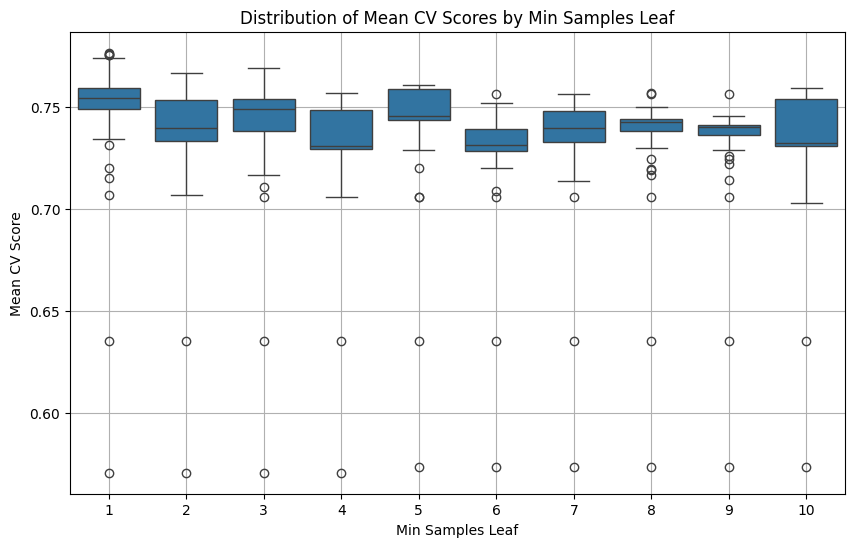

In [35]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='param_min_samples_leaf', y='mean_test_score', data=results_df)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean CV Score')
plt.title('Distribution of Mean CV Scores by Min Samples Leaf')
plt.grid(True)
plt.show()


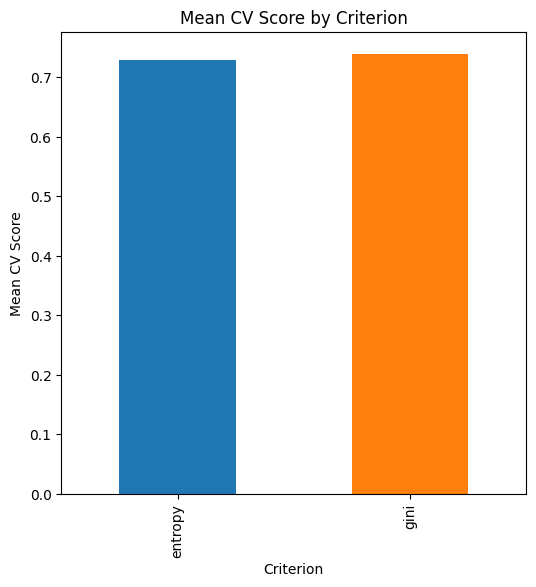

In [28]:
criterion_scores = results_df.groupby('param_criterion')['mean_test_score'].mean()

plt.figure(figsize=(6, 6))
criterion_scores.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Criterion')
plt.ylabel('Mean CV Score')
plt.title('Mean CV Score by Criterion')
plt.show()


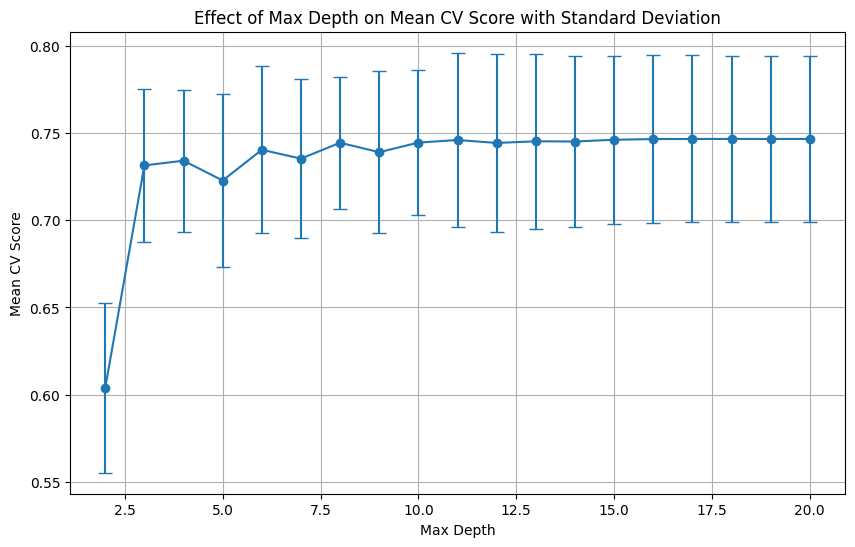

In [38]:
# Calculate mean and standard deviation by max depth
depth_stats = results_df.groupby('param_max_depth').agg({'mean_test_score': 'mean', 'std_test_score': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.errorbar(depth_stats['param_max_depth'], depth_stats['mean_test_score'], yerr=depth_stats['std_test_score'], fmt='-o', capsize=5)
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Score')
plt.title('Effect of Max Depth on Mean CV Score with Standard Deviation')
plt.grid(True)
plt.show()



Optimized Model Performance on Test Set:
Accuracy: 0.7727
Precision: 0.6727
Recall: 0.6852
F1 Score: 0.6789

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.67      0.69      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



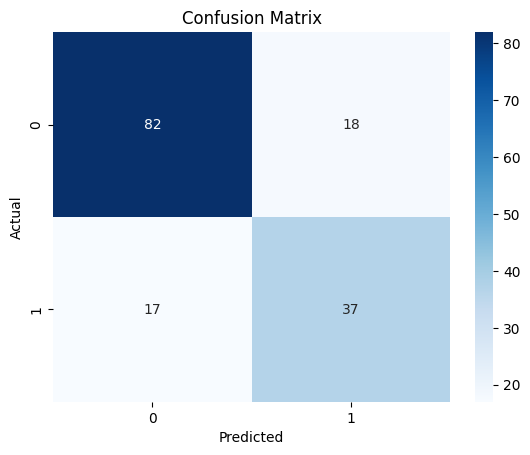

In [45]:
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=1, random_state=42)
best_dt.fit(X_train, y_train)

# Evaluate on test data
y_pred_best = best_dt.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("\nOptimized Model Performance on Test Set:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Random Forest Base Model Performance on Test Set:
Accuracy: 0.7468
Precision: 0.6271
Recall: 0.6852
F1 Score: 0.6549

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       100
           1       0.63      0.69      0.65        54

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



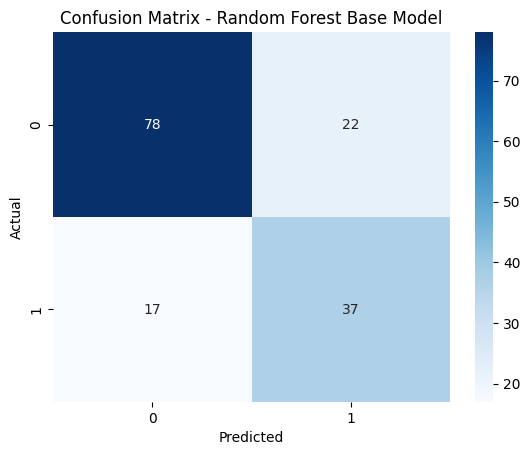

In [32]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Base Model Performance on Test Set:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Base Model')
plt.show()


In [17]:
# تعریف شبکه پارامتری برای جستجوی شبکه‌ای
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(1, 21, 1),
    'min_samples_leaf': range(1, 11, 1),
}

# ایجاد و تنظیم GridSearchCV برای جنگل تصادفی
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# اجرای جستجوی شبکه‌ای بر روی داده‌های آموزشی
grid_search_rf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11),
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [18]:
# تبدیل نتایج به DataFrame
results_rf_df = pd.DataFrame(grid_search_rf.cv_results_)

# مرتب‌سازی نتایج بر اساس میانگین نمره آزمون
results_rf_df = results_rf_df.sort_values(by='mean_test_score', ascending=False)

# نمایش ۱۰ ترکیب برتر
top_10_rf = results_rf_df[['params', 'mean_test_score', 'std_test_score']].head(10)
print("Top 10 Hyperparameter Combinations for Random Forest:\n", top_10_rf)


Top 10 Hyperparameter Combinations for Random Forest:
                                                 params  mean_test_score  \
421  {'max_depth': 15, 'min_samples_leaf': 1, 'n_es...         0.835238   
362  {'max_depth': 13, 'min_samples_leaf': 1, 'n_es...         0.834360   
361  {'max_depth': 13, 'min_samples_leaf': 1, 'n_es...         0.832611   
451  {'max_depth': 16, 'min_samples_leaf': 1, 'n_es...         0.832447   
511  {'max_depth': 18, 'min_samples_leaf': 1, 'n_es...         0.832203   
541  {'max_depth': 19, 'min_samples_leaf': 1, 'n_es...         0.832203   
571  {'max_depth': 20, 'min_samples_leaf': 1, 'n_es...         0.832203   
330  {'max_depth': 12, 'min_samples_leaf': 1, 'n_es...         0.832037   
392  {'max_depth': 14, 'min_samples_leaf': 1, 'n_es...         0.832027   
391  {'max_depth': 14, 'min_samples_leaf': 1, 'n_es...         0.830470   

     std_test_score  
421        0.040979  
362        0.033562  
361        0.033564  
451        0.041506  
511      

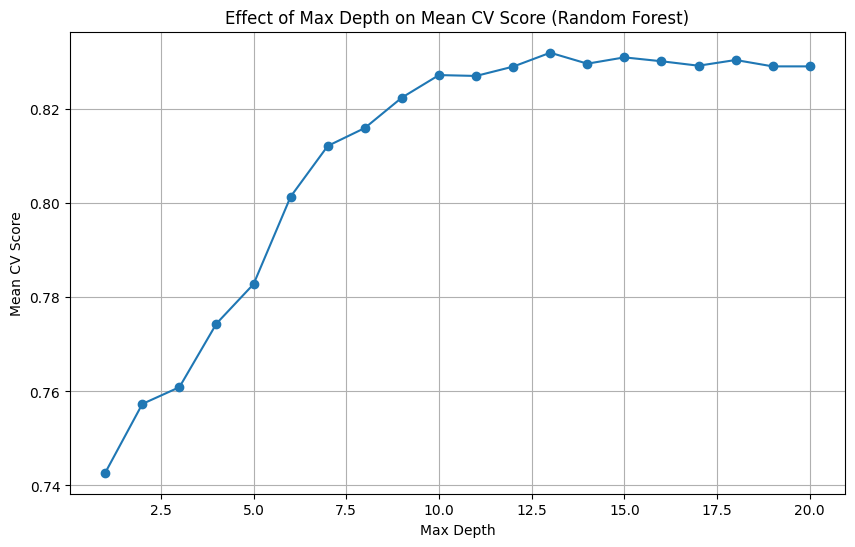

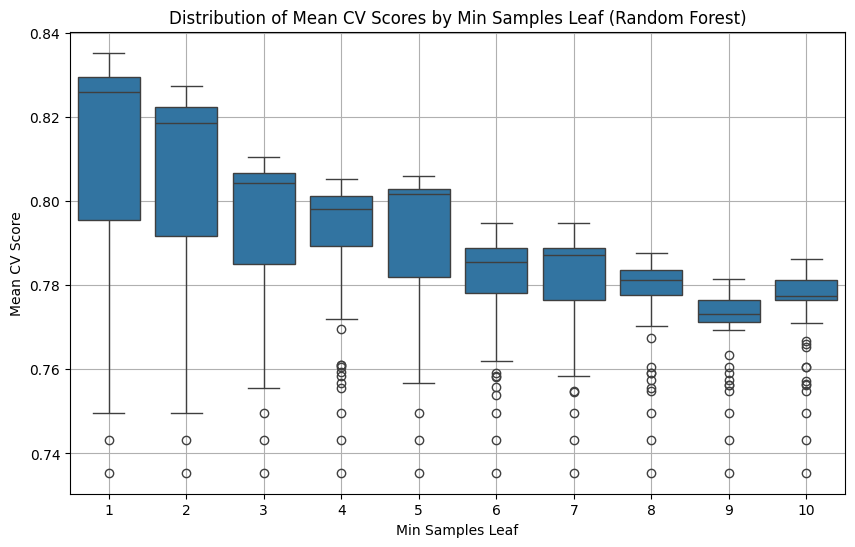

In [20]:
# نمودار خطی برای تاثیر max_depth بر میانگین نمره
depth_rf_scores = results_rf_df[results_rf_df['param_min_samples_leaf'] == 1].groupby('param_max_depth')['mean_test_score'].mean()
plt.figure(figsize=(10, 6))
plt.plot(depth_rf_scores.index, depth_rf_scores.values, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Score')
plt.title('Effect of Max Depth on Mean CV Score (Random Forest)')
plt.grid(True)
plt.show()

# نمودار جعبه‌ای برای min_samples_leaf بر اساس میانگین نمره
plt.figure(figsize=(10, 6))
sns.boxplot(x='param_min_samples_leaf', y='mean_test_score', data=results_rf_df)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean CV Score')
plt.title('Distribution of Mean CV Scores by Min Samples Leaf (Random Forest)')
plt.grid(True)
plt.show()



Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}

Optimized Random Forest Model Performance on Test Set:
Accuracy: 0.7597
Precision: 0.6393
Recall: 0.7222
F1 Score: 0.6783

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



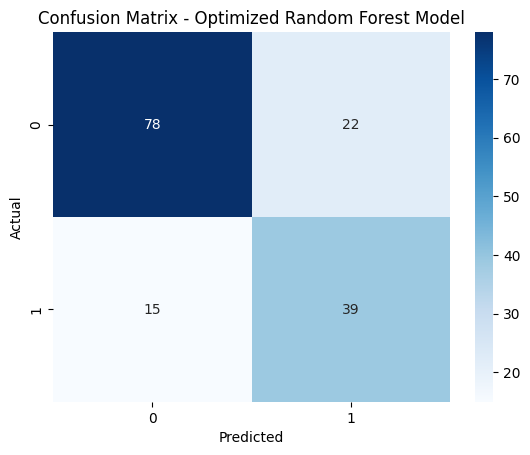

In [31]:
# انتخاب بهترین پارامترها و ایجاد مدل جنگل تصادفی بهینه
best_rf_params = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_rf_params)

best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train, y_train)

# ارزیابی مدل بهینه بر روی داده‌های تست
y_pred_best_rf = best_rf.predict(X_test)

# محاسبه متریک‌های عملکرد
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

# نمایش نتایج
print("\nOptimized Random Forest Model Performance on Test Set:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1 Score: {f1_best_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))

# رسم ماتریس سردرگمی
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Random Forest Model')
plt.show()
